In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.anova import stats
from sklearn.preprocessing import LabelEncoder

In [251]:
df = pd.read_csv('archive\Training Dataset.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [252]:
df.shape

(614, 13)

In [253]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [254]:
target = 'Loan_Status'

### Data Cleaning

In [255]:
df.duplicated().sum()

0

In [256]:
containing_null = []

for i in df.columns:
    if df[i].isnull().any():
        containing_null.append({
            'attribute': i,
            'portion': (df[i].isnull().sum() / len(df))*100
        })

In [257]:
containing_null

[{'attribute': 'Gender', 'portion': 2.1172638436482085},
 {'attribute': 'Married', 'portion': 0.4885993485342019},
 {'attribute': 'Dependents', 'portion': 2.44299674267101},
 {'attribute': 'Self_Employed', 'portion': 5.211726384364821},
 {'attribute': 'LoanAmount', 'portion': 3.5830618892508146},
 {'attribute': 'Loan_Amount_Term', 'portion': 2.2801302931596092},
 {'attribute': 'Credit_History', 'portion': 8.143322475570033}]

In [258]:
print(num_cols,cat_cols,sep='\n\n')

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [259]:
def handle_nulls(df):
    containing_null = []

    for i in df.columns:
        if df[i].isnull().any():
            containing_null.append({
                'attribute': i,
                'portion': (df[i].isnull().sum() / len(df))*100
            })

    num_cols = df.select_dtypes(include=['int64','float64']).columns.to_list()
    cat_cols = df.select_dtypes(include='object').columns.to_list()

    for i in num_cols:
        df[i] = df[i].fillna(df[i].mean())

    for i in cat_cols:
        df[i] = df[i].fillna(df[i].mode()[0])

    return df
    pass

In [260]:
df1 = handle_nulls(df)

In [261]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Data Processing and Visualization

In [262]:
df1.drop('Loan_ID',axis=1,inplace=True)
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [263]:
df1[target].unique()

array(['Y', 'N'], dtype=object)

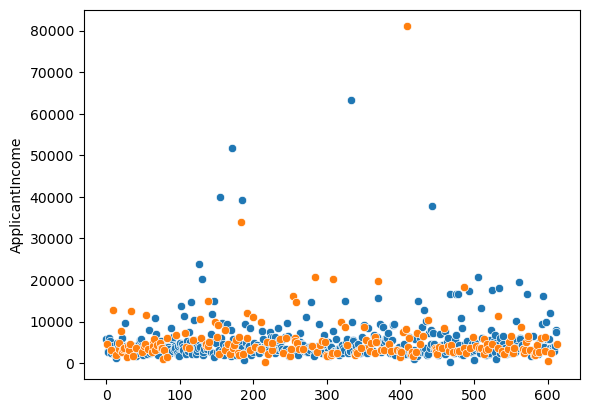

In [264]:
sns.scatterplot(df1[df1[target] == 'Y']['ApplicantIncome'],markers=['s'])
sns.scatterplot(df1[df1[target] == 'N']['ApplicantIncome'],markers=['o'])
plt.show()

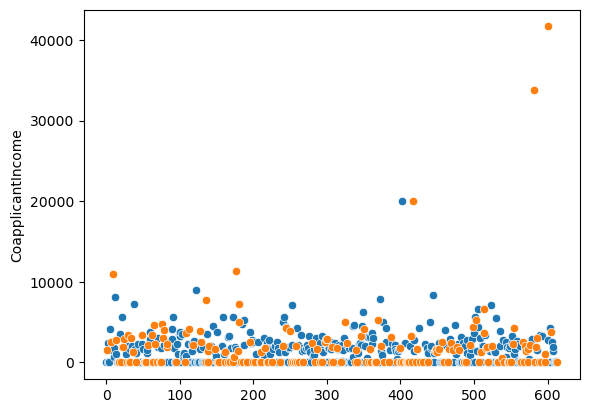

In [265]:
sns.scatterplot(df1[df1[target] == 'Y']['CoapplicantIncome'],markers=['s'])
sns.scatterplot(df1[df1[target] == 'N']['CoapplicantIncome'],markers=['o'])
plt.show()

In [266]:
len(df1[df1['CoapplicantIncome'] == 0]['CoapplicantIncome'])

273

<Axes: xlabel='Self_Employed', ylabel='count'>

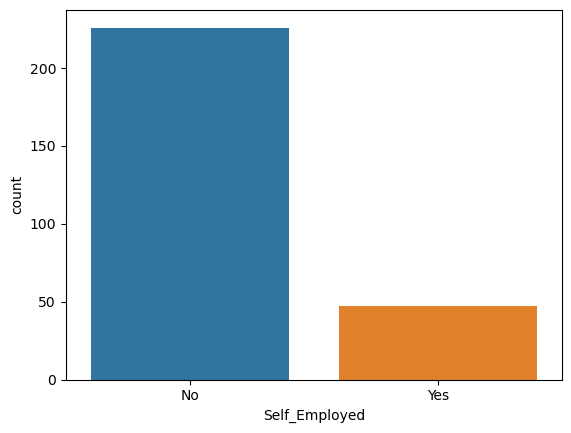

In [267]:
sns.countplot(x=df1[df1['CoapplicantIncome'] == 0]['Self_Employed'])

<Axes: ylabel='Credit_History'>

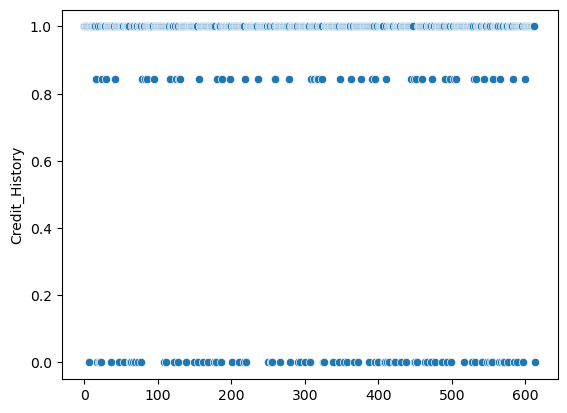

In [268]:
sns.scatterplot(df1['Credit_History'])

In [269]:
df1['Credit_History'].value_counts()

Credit_History
1.000000    475
0.000000     89
0.842199     50
Name: count, dtype: int64

<Axes: xlabel='Property_Area', ylabel='count'>

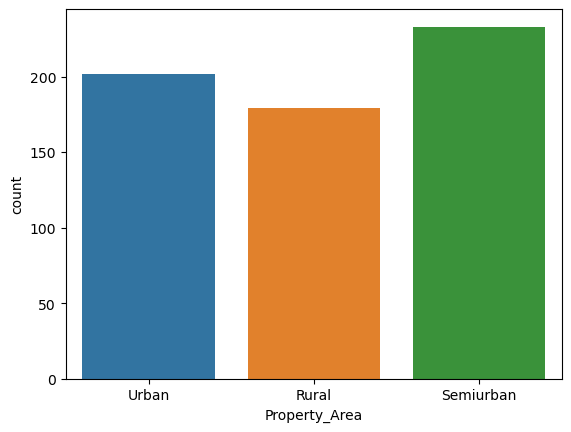

In [270]:
sns.countplot(x=df1['Property_Area'])

<Axes: >

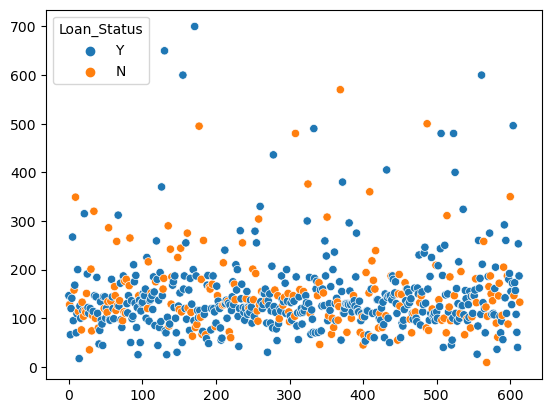

In [271]:
sns.scatterplot(x=df1['LoanAmount'].index,y=df1['LoanAmount'].values,markers=['o','s'],hue=df1[target])

<Axes: >

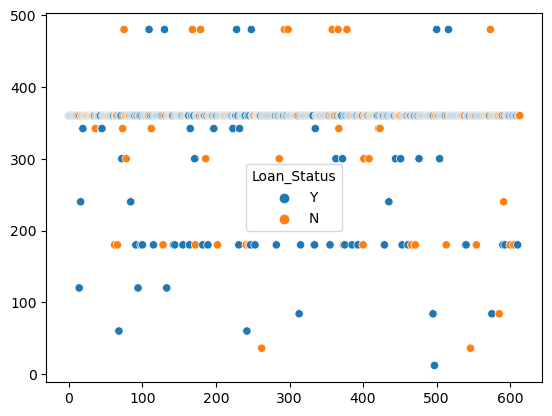

In [272]:
sns.scatterplot(x=df1['Loan_Amount_Term'].index,y=df1['Loan_Amount_Term'].values,hue=df1[target])

In [273]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.to_list()
cat_cols = df.select_dtypes(include='object').columns.to_list()

In [274]:
def encoding(dff):

    binary_cols = []

    for i in dff.columns:
        if (i in cat_cols) and (len(dff[i].unique()) == 2):
            binary_cols.append(i)
    
    encoder = LabelEncoder()

    for i in binary_cols:
        dff[i] = encoder.fit_transform(dff[i].to_frame())

    dff = pd.get_dummies(dff,drop_first=True,dtype=int)

    return dff
    pass

In [275]:
def scaling(dff,cols):
    sc = MinMaxScaler()

    for i in cols:
        dff[i] = sc.fit_transform(dff[i].to_frame())
    
    return dff


### Feature Selection

In [276]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    'logistic': LogisticRegression(),
    'svm': SVC(),
    'decisiontree': DecisionTreeClassifier()
}

In [277]:
from sklearn.metrics import accuracy_score, f1_score, precision_score

In [278]:
def model_fitting(models, X_train, y_train,X_test,y_test):
    for model in models:
        models[model].fit(X_train,y_train)
        y_pred = models[model].predict(X_test)
        print('Model: ',model)
        print('Accuracy: ',accuracy_score(y_test,y_pred))
        print('F1 Score : ',f1_score(y_test,y_pred))
        print('Precision Score : ',precision_score(y_test,y_pred))
        print(30*'-')

In [279]:
df_all = encoding(df1)
df_all.head()

c:\Users\yashu\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\yashu\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\yashu\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\yashu\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,0,1
1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,0,0
2,1,1,0,1,3000,0.0,66.000000,360.0,1.0,1,0,0,0,0,1
3,1,1,1,0,2583,2358.0,120.000000,360.0,1.0,1,0,0,0,0,1
4,1,0,0,0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,0,1


In [280]:
df_all_scaled = scaling(df_all,['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'])

In [281]:
df_all_scaled.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0.070489,0.000000,0.198860,0.74359,1.0,1,0,0,0,0,1
1,1,1,0,0,0.054830,0.036192,0.172214,0.74359,1.0,0,1,0,0,0,0
2,1,1,0,1,0.035250,0.000000,0.082489,0.74359,1.0,1,0,0,0,0,1
3,1,1,1,0,0.030093,0.056592,0.160637,0.74359,1.0,1,0,0,0,0,1
4,1,0,0,0,0.072356,0.000000,0.191027,0.74359,1.0,1,0,0,0,0,1


In [282]:
cor = df_all.corr()

<Axes: >

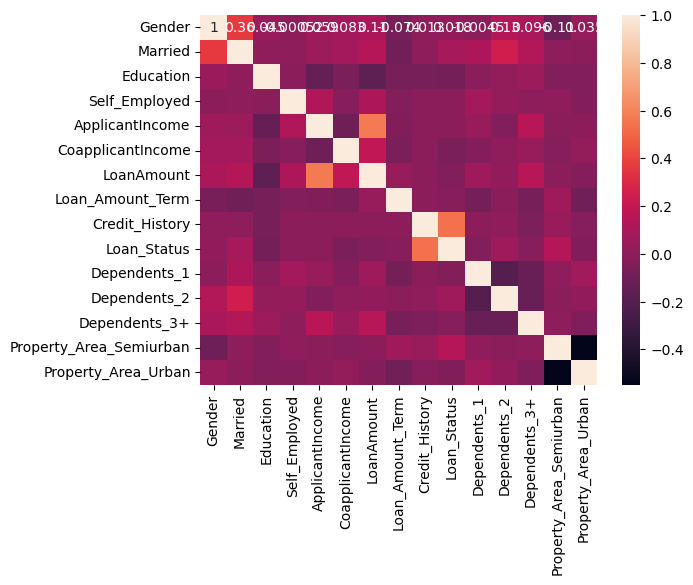

In [283]:
sns.heatmap(cor,annot=True)

Chi-Square

In [284]:
def only_labelencoding(dff):
    encoder = LabelEncoder()
    for i in dff.columns:
        if i in cat_cols:
            dff[i] = encoder.fit_transform(dff[i].to_frame())

    return dff
    pass

In [285]:
df_chi = only_labelencoding(df1[cat_cols])

c:\Users\yashu\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yashu\AppData\Local\Temp\ipykernel_15020\247191200.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff[i] = encoder.fit_transform(dff[i].to_frame())
c:\Users\yashu\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yashu\AppData\Local\Temp\ipykernel_15020\247191

In [286]:
df_chi.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1


In [287]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_chi.drop(target,axis=1),df_chi[target],test_size=0.25,random_state=40)

In [288]:
from sklearn.feature_selection import chi2

chi2_stats, pvalues = chi2(X_train,y_train)


In [289]:
chi2_stats

array([0.02745916, 1.64646581, 0.30484748, 1.40870855, 0.19247686,
       0.00258961])

In [290]:
pvalues

array([0.8683867 , 0.19944064, 0.58085932, 0.2352709 , 0.66086309,
       0.95941459])

In [291]:
features = pd.Series(chi2_stats,df_chi.drop(target,axis=1).columns)
features.sort_values(ascending=False)

Married          1.646466
Education        1.408709
Dependents       0.304847
Self_Employed    0.192477
Gender           0.027459
Property_Area    0.002590
dtype: float64

In [292]:
features = pd.Series(pvalues,df_chi.drop(target,axis=1).columns)
features.sort_values()

Married          0.199441
Education        0.235271
Dependents       0.580859
Self_Employed    0.660863
Gender           0.868387
Property_Area    0.959415
dtype: float64

In [293]:
chi2_selected_features = ['Married', 'Education','Dependents']

### Model Building

In [294]:
def preprocessing(dff):
    dff = handle_nulls(dff)
    dff.drop('Loan_ID',axis=1,inplace=True)
    dff = encoding(dff[selected_features])
    dff = scaling(dff,['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'])

    return dff
    pass

In [295]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(5), int64(1), object(2)
memory usage: 45.7+ KB


In [318]:
selected_features = num_cols.copy()

In [297]:
selected_features.extend(chi2_selected_features)

In [298]:
len(selected_features)

8

In [299]:
X = encoding(df1[selected_features])

c:\Users\yashu\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yashu\AppData\Local\Temp\ipykernel_15020\3737410718.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff[i] = encoder.fit_transform(dff[i].to_frame())
c:\Users\yashu\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yashu\AppData\Local\Temp\ipykernel_15020\3737

In [300]:
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married,Education,Dependents_1,Dependents_2,Dependents_3+
0,5849,0.0,146.412162,360.0,1.0,0,0,0,0,0
1,4583,1508.0,128.000000,360.0,1.0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,1,0,0,0,0
3,2583,2358.0,120.000000,360.0,1.0,1,1,0,0,0
4,6000,0.0,141.000000,360.0,1.0,0,0,0,0,0


In [301]:
y = only_labelencoding(df1[target].to_frame())
y

c:\Users\yashu\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [302]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=40)

In [303]:
model_fitting(models,X_train,y_train,X_test,y_test)

c:\Users\yashu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\yashu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\yashu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model:  logistic
Accuracy:  0.8181818181818182
F1 Score :  0.8861788617886179
Precision Score :  0.8074074074074075
------------------------------
Model:  svm
Accuracy:  0.7142857142857143
F1 Score :  0.8333333333333334
Precision Score :  0.7189542483660131
------------------------------
Model:  decisiontree
Accuracy:  0.6948051948051948
F1 Score :  0.7892376681614349
Precision Score :  0.7857142857142857
------------------------------


##### Thus LogisticRegression performs very well for this problem.
##### We will select the LogisticRegreesion as our final model.

In [304]:
final_model = LogisticRegression()

In [305]:
final_model.fit(X_train,y_train)

c:\Users\yashu\anaconda3\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\yashu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [306]:
y_pred = final_model.predict(X_test)

In [307]:
print(accuracy_score(y_test,y_pred))

0.8181818181818182


In [308]:
print(precision_score(y_test,y_pred))

0.8074074074074075


### Submission

In [309]:
test_data = pd.read_csv('archive\Test Dataset.csv')
test_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [310]:
test_result_frame = test_data['Loan_ID'].to_frame()

In [311]:
processed = preprocessing(test_data)

c:\Users\yashu\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yashu\AppData\Local\Temp\ipykernel_15020\3737410718.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff[i] = encoder.fit_transform(dff[i].to_frame())
c:\Users\yashu\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\yashu\AppData\Local\Temp\ipykernel_15020\3737

In [312]:
processed.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Married,Education,Dependents_1,Dependents_2,Dependents_3+
0,0.078865,0.000000,0.157088,0.746835,1.000000,1,0,0,0,0
1,0.042411,0.062500,0.187739,0.746835,1.000000,1,0,1,0,0
2,0.068938,0.075000,0.344828,0.746835,1.000000,1,0,0,1,0
3,0.032263,0.106083,0.137931,0.746835,0.825444,1,0,0,1,0
4,0.045168,0.000000,0.095785,0.746835,1.000000,0,1,0,0,0


In [313]:
y_pred = final_model.predict(processed)

In [314]:
y_pred_decoded = []

for i in y_pred:
    if i == 1:
        y_pred_decoded.append('Y')
    else:
        y_pred_decoded.append('N')

In [315]:
test_result_frame['Loan_Status'] = y_pred_decoded

In [316]:
results = pd.read_csv('archive\Sample_Submission.csv')
results.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [317]:
final_submission_file = test_result_frame.to_csv('Final_Submission_File.csv',index=False)